In [1]:
import json
from pprint import pprint
import pandas as pd
import os
import pickle
import numpy as np
import ipywidgets as widgets
from IPython.display import display

data = open(r"C:\Users\mauro\Downloads\players_advancedstats_Serie_A_2020_2021", "rb")
players = open(r"D:\Anaconda\progetto\FDA\players_Serie_A_2020_2021", "rb")
ad_st = pickle.load(data)
players = pickle.load(players)

In [2]:
CODE_FOLDER = os.getcwd()
DATA_FOLDER = os.getcwd().replace("code", "data")

In [3]:
df = pickle.load(open( r"C:\Users\mauro\Downloads\data\preprocessing_dataset", "rb"))
df
zappacosta = df.loc[df['player_name']=='D. Zappacosta']
zappacosta

,team_id,team_name,main_scheme,player_id,player_name,height,weight,age,birth_area,passport_area,foot,main_role,contractExpiration
386,3193.0,Genoa,3-5-2,22889,D. Zappacosta,182,74,28,ITA,ITA,right,Right Wingback,2022.0


In [4]:
df.columns

Index(['team_id', 'team_name', 'main_scheme', 'player_id', 'player_name',
       'height', 'weight', 'age', 'birth_area', 'passport_area', 'foot',
       'main_role', 'contractExpiration'],
      dtype='object')

In [5]:
WIDGET_TYPE = {
    "category":["team_name", "main_scheme", "birth_area", "passport_area", "foot", "main_role"],
    "numeric":["age", "height", "weight", "contractExpiration"]
}
widgets_dict = {}
for w_type in WIDGET_TYPE.keys():
    for col in WIDGET_TYPE[w_type]:
        options_list = [x for x in list(df[col].unique()) if x == x and x is not None]
        if w_type == "category":
            widgets_dict[col] = widgets.SelectMultiple(options=sorted(options_list), description=col)
        elif w_type == "numeric":
            min_, max_ = df[df[col] > 0][col].min(), df[df[col] > 0][col].max()
            if col == "contractExpiration":
                min_ = 2021
            widgets_dict[col] = widgets.IntRangeSlider(value=[min_, max_], min=min_, max=max_, step=1, description=col)
        display(widgets_dict[col])

w = widgets.Dropdown(options=df["player_name"].sort_values(), disabled=False)
display(w)

SelectMultiple(description='team_name', options=('Atalanta', 'Benevento', 'Bologna', 'Cagliari', 'Crotone', 'F…

SelectMultiple(description='main_scheme', options=('3-4-1-2', '3-4-2-1', '3-4-3', '3-5-2', '4-2-3-1', '4-3-2-1…

SelectMultiple(description='birth_area', options=('AGO', 'ALB', 'ARG', 'ARM', 'AUT', 'BEL', 'BGR', 'BIH', 'BRA…

SelectMultiple(description='passport_area', options=('AGO', 'ALB', 'ARG', 'ARM', 'AUT', 'BEL', 'BEN', 'BFA', '…

SelectMultiple(description='foot', options=('both', 'left', 'right'), value=())

SelectMultiple(description='main_role', options=('Attacking Midfielder', 'Centre Back', 'Defensive Midfielder'…

IntRangeSlider(value=(15, 43), description='age', max=43, min=15)

IntRangeSlider(value=(163, 202), description='height', max=202, min=163)

IntRangeSlider(value=(58, 96), description='weight', max=96, min=58)

IntRangeSlider(value=(2021, 2026), description='contractExpiration', max=2026, min=2021)

Dropdown(options=('A. Adorante', 'A. Arnofoli', 'A. Baldursson', 'A. Bane', 'A. Barreca', 'A. Barák', 'A. Basi…

In [15]:
player_selected = w.value

In [16]:
aux = df.copy()
for col in widgets_dict.keys():
    if col in WIDGET_TYPE["category"]:
        values = list(widgets_dict[col].value)
        if len(values) > 0:
            query = col + " in " + str(values)
            print(query)
            aux = aux.query(query)
    elif col in WIDGET_TYPE["numeric"]:
        query = col + " >= " + str(widgets_dict[col].value[0]) + " and " + col + " <= " + str(widgets_dict[col].value[1])
        print(query)
        aux = aux.query(query)

main_role in ['Left Back', 'Left Back (5 at the back)', 'Left Wingback']
age >= 15 and age <= 28
height >= 175 and height <= 202
weight >= 58 and weight <= 96
contractExpiration >= 2021 and contractExpiration <= 2026


In [17]:
aux['main_role'] = aux['main_role'].fillna('dato non disponibile')
aux

,team_id,team_name,main_scheme,player_id,player_name,height,weight,age,birth_area,passport_area,foot,main_role,contractExpiration
17,3157.0,Milan,4-2-3-1,344132,Theo Hernández,184,81,23,FRA,ESP,left,Left Back,2024.0
26,3158.0,Roma,3-4-3,542200,R. Calafiori,183,78,19,ITA,ITA,left,Left Back,2025.0
39,3158.0,Roma,3-4-3,190167,L. Spinazzola,186,75,28,ITA,ITA,right,Left Wingback,2024.0
75,3159.0,Juventus,4-4-2,489124,G. Frabotta,176,70,21,ITA,ITA,left,Left Back,2025.0
79,3160.0,Parma,4-3-3,603543,V. Zagaritis,178,68,20,GRC,GRC,left,Left Wingback,2024.0
153,3162.0,Lazio,3-5-2,228928,A. Marušić,185,85,28,MNE,MNE,right,Left Wingback,2022.0
159,3162.0,Lazio,3-5-2,328336,M. Fares,183,72,25,FRA,DZA,left,Left Wingback,2025.0
185,3163.0,Udinese,5-3-2,377074,T. Ouwejan,178,72,24,NLD,NLD,left,Left Wingback,2023.0
206,3164.0,Sampdoria,4-4-1-1,222964,T. Augello,180,70,26,ITA,ITA,left,Left Back,2025.0
215,3166.0,Bologna,4-2-3-1,596046,A. Hickey,175,72,18,XSC,XSC,right,Left Back,2024.0


In [18]:
pd.set_option('display.max_rows', aux.shape[0]+1)
aux.sort_values('player_name')

,team_id,team_name,main_scheme,player_id,player_name,height,weight,age,birth_area,passport_area,foot,main_role,contractExpiration
313,3176.0,Fiorentina,3-5-2,300373,A. Barreca,183,70,26,ITA,ITA,left,Left Wingback,2023.0
215,3166.0,Bologna,4-2-3-1,596046,A. Hickey,175,72,18,XSC,XSC,right,Left Back,2024.0
153,3162.0,Lazio,3-5-2,228928,A. Marušić,185,85,28,MNE,MNE,right,Left Wingback,2022.0
447,3197.0,Crotone,3-5-2,212219,A. Reca,187,76,25,POL,POL,left,Left Wingback,2022.0
290,3173.0,Cagliari,3-5-2,405601,A. Tripaldelli,180,77,22,ITA,ITA,left,Left Back,2023.0
306,3176.0,Fiorentina,3-5-2,21842,C. Biraghi,183,78,28,ITA,ITA,left,Left Wingback,2024.0
280,3173.0,Cagliari,3-5-2,92900,C. Lykogiannis,190,87,27,GRC,GRC,left,Left Back,2022.0
516,3219.0,Benevento,4-3-2-1,399490,D. Foulon,180,70,22,BEL,BEL,left,Left Back,2023.0
356,3187.0,Napoli,4-2-3-1,21001,E. Hysaj,182,70,27,ALB,ALB,right,Left Back,2021.0
511,3219.0,Benevento,4-3-2-1,134476,F. Barba,186,80,27,ITA,ITA,left,Left Back,2023.0


In [19]:
print("There are " + str(len(aux)) + " players selected!")

There are 34 players selected!


In [20]:
players_selected = []
for n in aux['player_name']:
    players_selected.append(n)

In [22]:
row_player_selected = df.loc[df['player_name']==player_selected]
new = [row_player_selected, aux]
aux = pd.concat(new, axis=0)
aux.drop_duplicates("player_name", keep = "last", inplace = True)
aux


,team_id,team_name,main_scheme,player_id,player_name,height,weight,age,birth_area,passport_area,foot,main_role,contractExpiration
17,3157.0,Milan,4-2-3-1,344132,Theo Hernández,184,81,23,FRA,ESP,left,Left Back,2024.0
26,3158.0,Roma,3-4-3,542200,R. Calafiori,183,78,19,ITA,ITA,left,Left Back,2025.0
39,3158.0,Roma,3-4-3,190167,L. Spinazzola,186,75,28,ITA,ITA,right,Left Wingback,2024.0
75,3159.0,Juventus,4-4-2,489124,G. Frabotta,176,70,21,ITA,ITA,left,Left Back,2025.0
79,3160.0,Parma,4-3-3,603543,V. Zagaritis,178,68,20,GRC,GRC,left,Left Wingback,2024.0
153,3162.0,Lazio,3-5-2,228928,A. Marušić,185,85,28,MNE,MNE,right,Left Wingback,2022.0
159,3162.0,Lazio,3-5-2,328336,M. Fares,183,72,25,FRA,DZA,left,Left Wingback,2025.0
185,3163.0,Udinese,5-3-2,377074,T. Ouwejan,178,72,24,NLD,NLD,left,Left Wingback,2023.0
206,3164.0,Sampdoria,4-4-1-1,222964,T. Augello,180,70,26,ITA,ITA,left,Left Back,2025.0
215,3166.0,Bologna,4-2-3-1,596046,A. Hickey,175,72,18,XSC,XSC,right,Left Back,2024.0


In [23]:
df = aux
advanced_stats = pickle.load(open(r"C:\Users\mauro\Downloads\players_advancedstats_Serie_A_2020_2021", "rb"))
advanced_stats = pd.DataFrame(advanced_stats).transpose().dropna(how="all")

average_stats = pd.json_normalize(advanced_stats["average"])
average_stats.columns = average_stats.columns + "_P90"
average_stats.index = advanced_stats.index

percent_stats = pd.json_normalize(advanced_stats["percent"])
percent_stats.columns = "%_" + percent_stats.columns
percent_stats.index = advanced_stats.index
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
stats = pd.merge(average_stats, percent_stats, left_index=True, right_index=True)
scaler = MinMaxScaler()
stats_scaled = scaler.fit_transform(stats)
stats_scaled = pd.DataFrame(stats_scaled)
stats_scaled.columns, stats_scaled.index = stats.columns, stats.index

stats = pd.merge(advanced_stats[["competitionId", "seasonId"]], stats_scaled, left_index=True, right_index=True)


final_df = pd.merge(df, stats_scaled, left_on="player_id", right_index=True, how="left")

In [24]:
final_df

,team_id,team_name,main_scheme,player_id,player_name,height,weight,age,birth_area,passport_area,...,%_dribblesAgainstWon,%_fieldAerialDuelsWon,%_gkSaves,%_gkSuccessfulExits,%_gkAerialDuelsWon,%_newDuelsWon,%_newDefensiveDuelsWon,%_newOffensiveDuelsWon,%_newSuccessfulDribbles,%_successfulLateralPasses
17,3157.0,Milan,4-2-3-1,344132,Theo Hernández,184,81,23,FRA,ESP,...,0.4607,0.5663,0.0,0.0,0.0,0.5643,0.6129,0.5583,0.6061,0.8704
26,3158.0,Roma,3-4-3,542200,R. Calafiori,183,78,19,ITA,ITA,...,0.1250,0.6667,0.0,0.0,0.0,0.4615,0.3333,0.6000,0.5000,1.0000
39,3158.0,Roma,3-4-3,190167,L. Spinazzola,186,75,28,ITA,ITA,...,0.3810,0.4706,0.0,0.0,0.0,0.5373,0.6421,0.5176,0.5904,0.7990
75,3159.0,Juventus,4-4-2,489124,G. Frabotta,176,70,21,ITA,ITA,...,0.5238,0.4839,0.0,0.0,0.0,0.4800,0.5893,0.4000,0.4444,0.8836
79,3160.0,Parma,4-3-3,603543,V. Zagaritis,178,68,20,GRC,GRC,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
153,3162.0,Lazio,3-5-2,228928,A. Marušić,185,85,28,MNE,MNE,...,0.4875,0.5060,0.0,0.0,0.0,0.4961,0.6207,0.3873,0.5070,0.8703
159,3162.0,Lazio,3-5-2,328336,M. Fares,183,72,25,FRA,DZA,...,0.3721,0.4545,0.0,0.0,0.0,0.4608,0.4681,0.5000,0.5172,0.7231
185,3163.0,Udinese,5-3-2,377074,T. Ouwejan,178,72,24,NLD,NLD,...,0.1875,0.2727,0.0,0.0,0.0,0.3768,0.4138,0.2353,0.2857,0.6885
206,3164.0,Sampdoria,4-4-1-1,222964,T. Augello,180,70,26,ITA,ITA,...,0.5521,0.7237,0.0,0.0,0.0,0.5859,0.6570,0.4896,0.5566,0.8330
215,3166.0,Bologna,4-2-3-1,596046,A. Hickey,175,72,18,XSC,XSC,...,0.3864,0.5833,0.0,0.0,0.0,0.4545,0.4930,0.4167,0.4242,0.8551


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import ipywidgets as widgets

MACRO_AREAS = {
    "ATTACK":["%_successfulLinkupPlays", "attackingActions_P90", "foulsSuffered_P90", 
              "linkupPlays_P90", "offsides_P90", "receivedPass_P90", "successfulAttackingActions_P90",
              "successfulLinkupPlays_P90", "touchInBox_P90"],
    "CARDS":["%_yellowCardsPerFoul", "directRedCards_P90", "redCards_P90", "yellowCards_P90"],
    "CROSS":["%_successfulCrosses", "crosses_P90", "successfulCrosses_P90"],
    "DEFENSE":["%_dribblesAgainstWon", "%_successfulSlidingTackles", "ballLosses_P90", 
               "ballRecoveries_P90", "clearances_P90", "counterpressingRecoveries_P90",
               "dangerousOpponentHalfRecoveries_P90", "dangerousOwnHalfLosses_P90",
               "defensiveActions_P90", "dribblesAgainst_P90", "dribblesAgainstWon_P90",
               "interceptions_P90", "losses_P90", "missedBalls_P90", "opponentHalfRecoveries_P90",
               "ownHalfLosses_P90", "shotsBlocked_P90", "slidingTackles_P90", 
               "successfulDefensiveAction_P90", "successfulSlidingTackles_P90"],
    "DRIBBLING":["%_newSuccessfulDribbles", "%_successfulDribbles", "dribbles_P90",
                 "newSuccessfulDribbles_P90", "successfulDribbles_P90"],
    "DUELS":["%_aerialDuelsWon", "%_defensiveDuelsWon", "%_duelsWon",
             "%_fieldAerialDuelsWon", "%_newDefensiveDuelsWon", "%_newDuelsWon",
             "%_newOffensiveDuelsWon", "%_offensiveDuelsWon", "aerialDuels_P90",
             "defensiveDuels_P90", "defensiveDuelsWon_P90", "duels_P90",
             "duelsWon_P90", "fieldAerialDuels_P90", "fieldAerialDuelsWon_P90",
             "fouls_P90", "looseBallDuels_P90", "looseBallDuelsWon_P90",
             "newDefensiveDuelsWon_P90", "newDuelsWon_P90", "newOffensiveDuelsWon_P90",
             "offensiveDuels_P90", "offensiveDuelsWon_P90"],
    "GOALKEEPER":["%_gkAerialDuelsWon", "%_gkSaves", "%_gkSuccessfulExits", 
                  "%_successfulGoalKicks", "gkAerialDuels_P90", "gkAerialDuelsWon_P90",
                  "gkConcededGoals_P90", "gkExits_P90", "gkSaves_P90", "gkShotsAgainst_P90",
                  "gkSuccessfulExits_P90", "goalKicks_P90", "goalKicksLong_P90",
                  "goalKicksShort_P90", "successfulGoalKicks_P90", "xgSave_P90"],
    "PASSES":["%_successfulBackPasses", "%_successfulForwardPasses", "%_successfulKeyPasses",
              "%_successfulLongPasses", "%_successfulPasses", "%_successfulPassesToFinalThird",
              "%_successfulProgressivePasses", "%_successfulShotAssists", 
              "%_successfulSmartPasses", "%_successfulThroughPasses", 
              "%_successfulVerticalPasses", "assists_P90", "backPasses_P90",
              "dribbleDistanceFromOpponentGoal_P90", "forwardPasses_P90", "keyPasses_P90",
              "lateralPasses_P90", "longPasses_P90", "longPassLength_P90", "passes_P90",
              "passesToFinalThird_P90", "passLength_P90", "progressivePasses_P90",
              "secondAssists_P90", "shotAssists_P90", "shotOnTargetAssists_P90", 
              "smartPasses_P90", "successfulBackPasses_P90", "successfulForwardPasses_P90",
              "successfulKeyPasses_P90", "successfulLateralPasses_P90", "successfulLongPasses_P90",    
              "successfulPasses_P90", "successfulPassesToFinalThird_P90", "successfulProgressivePasses_P90",
              "successfulSmartPasses_P90", "successfulThroughPasses_P90", "successfulVerticalPasses_P90",
              "thirdAssists_P90", "throughPasses_P90", "verticalPasses_P90",
              "xgAssist_P90", "%_successfulLateralPasses"],
    "PHYSICS":["accelerations_P90", "progressiveRun_P90"],
    "SET_PIECES":["%_directFreeKicksOnTarget", "%_penaltiesConversion", "corners_P90", 
                  "directFreeKicks_P90", "directFreeKicksOnTarget_P90", "freeKicks_P90",
                  "freeKicksOnTarget_P90", "penalties_P90", "successfulPenalties_P90"],
    "SHOTS":["%_goalConversion", "%_headShotsOnTarget", "%_shotsOnTarget", "goals_P90", 
             "headShots_P90", "shots_P90", "shotsOnTarget_P90", "xgShot_P90"]
}


        
checkboxes = [widgets.Checkbox(value=False, description=label) for label in MACRO_AREAS]
output = widgets.VBox(children=checkboxes)
display(output)







In [28]:
selected_data = []

for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]

data_clustering = []
for key in selected_data:
    data_clustering.append(MACRO_AREAS[key])

        
data_list = []

for n in data_clustering:
    for item in n:
        data_list.append(item)




checkboxes_1 = [widgets.Checkbox(value=False, description=label) for label in data_list]
output = widgets.VBox(children=checkboxes_1)
display(output)



        

        
                
    
    



In [45]:
selected_data

['ATTACK',
 'CROSS',
 'DEFENSE',
 'DRIBBLING',
 'DUELS',
 'PASSES',
 'PHYSICS',
 'SHOTS']

In [46]:
data_for_clustering = []
for i in range(0, len(checkboxes_1)):
    if checkboxes_1[i].value == True:
        data_for_clustering = data_for_clustering + [checkboxes_1[i].description]

In [47]:
data_for_clustering

['%_successfulLinkupPlays',
 'attackingActions_P90',
 'successfulAttackingActions_P90',
 'touchInBox_P90',
 'crosses_P90',
 'successfulCrosses_P90',
 '%_dribblesAgainstWon',
 '%_successfulSlidingTackles',
 'counterpressingRecoveries_P90',
 'dangerousOpponentHalfRecoveries_P90',
 'dribblesAgainst_P90',
 'dribblesAgainstWon_P90',
 'successfulDefensiveAction_P90',
 '%_successfulDribbles',
 '%_aerialDuelsWon',
 '%_defensiveDuelsWon',
 '%_duelsWon',
 '%_offensiveDuelsWon',
 'aerialDuels_P90',
 'defensiveDuels_P90',
 '%_successfulForwardPasses',
 '%_successfulKeyPasses',
 '%_successfulPassesToFinalThird',
 '%_successfulProgressivePasses',
 'accelerations_P90',
 'progressiveRun_P90',
 '%_goalConversion',
 '%_headShotsOnTarget',
 '%_shotsOnTarget',
 'headShots_P90']

In [48]:
df_for_clustering = final_df[data_for_clustering]
players_analysis = aux['player_name']


In [49]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_for_clustering = df_for_clustering.dropna(0)

X = pd.DataFrame(df_for_clustering)


In [50]:
analisi_finale = X
players = final_df['player_name']
data = [analisi_finale, players]
data_finale = pd.concat(data, axis=1)
data_similiarity = data_finale
data_similiarity

,%_successfulLinkupPlays,attackingActions_P90,successfulAttackingActions_P90,touchInBox_P90,crosses_P90,successfulCrosses_P90,%_dribblesAgainstWon,%_successfulSlidingTackles,counterpressingRecoveries_P90,dangerousOpponentHalfRecoveries_P90,...,%_successfulKeyPasses,%_successfulPassesToFinalThird,%_successfulProgressivePasses,accelerations_P90,progressiveRun_P90,%_goalConversion,%_headShotsOnTarget,%_shotsOnTarget,headShots_P90,player_name
17,0.00,0.330725,0.300142,0.154107,0.220444,0.120782,0.4607,0.0000,0.285377,0.176471,...,1.0000,0.7598,0.7543,0.820408,0.708117,0.17070,0.6667,0.2927,0.069767,Theo Hernández
26,0.00,0.088905,0.088905,0.084861,0.000000,0.000000,0.1250,0.0000,0.589623,0.000000,...,0.0000,0.0000,0.8000,0.000000,0.863558,0.00000,0.0000,0.0000,0.000000,R. Calafiori
39,0.00,0.503912,0.495021,0.189409,0.418667,0.280639,0.3810,0.0000,0.240566,0.223529,...,1.0000,0.7500,0.7682,0.475510,1.000000,0.11110,0.0000,0.3889,0.000000,L. Spinazzola
75,0.00,0.269915,0.197013,0.131025,0.385778,0.257549,0.5238,0.6667,0.185142,0.282353,...,1.0000,0.7714,0.7313,0.146939,0.229706,0.00000,0.0000,0.4000,0.093023,G. Frabotta
79,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,V. Zagaritis
153,0.00,0.175676,0.158606,0.125594,0.172444,0.134991,0.4875,0.2500,0.260613,0.123529,...,1.0000,0.6929,0.7121,0.120408,0.233161,0.07407,0.3333,0.4815,0.139535,A. Marušić
159,0.00,0.279516,0.217639,0.106585,0.391111,0.278863,0.3721,0.6000,0.286557,0.370588,...,1.0000,0.6667,0.7200,0.240816,0.257340,0.00000,1.0000,0.3333,0.062016,M. Fares
185,0.00,0.304765,0.162873,0.142566,0.525333,0.236234,0.1875,0.0000,0.270047,0.335294,...,0.5000,0.6154,0.6522,0.271429,0.196891,0.00000,0.0000,0.3333,0.000000,T. Ouwejan
206,0.00,0.263869,0.229018,0.046164,0.356444,0.246892,0.5521,0.5000,0.346698,0.176471,...,1.0000,0.6616,0.7289,0.306122,0.352332,0.12500,0.0000,0.2500,0.000000,T. Augello
215,0.00,0.178165,0.135135,0.052953,0.088889,0.039076,0.3864,0.2500,0.487028,0.194118,...,0.0000,0.8611,0.7368,0.273469,0.212435,0.00000,0.0000,0.0000,0.000000,A. Hickey


In [51]:
data_similiarity = data_similiarity.dropna()
data_similiarity.to_json(r'C:\Users\mauro\OneDrive\Desktop\FDA project work\data_gosens.json')

In [52]:
player_target = data_similiarity.loc[data_similiarity['player_name']==player_selected]

In [53]:
attack_dic = []
cards_dic = []
cross_dic = []
defense_dic = []
dribbling_dic = []
duels_dic = []
goalkeeper_dic = []
passess_dic = []
physics_dic = []
set_pieces_dic = []
shots_dic = []

import scipy
for n in data_similiarity.columns:   
    if n in MACRO_AREAS['ATTACK']:
        attack_dic.append(n)
        ATTACK = pd.DataFrame(data_similiarity, columns = attack_dic)
        
        
    elif n in MACRO_AREAS['CARDS']:
        cards_dic.append(n)
        CARDS = pd.DataFrame(data_similiarity, columns = cards_dic)
        
    elif n in MACRO_AREAS['CROSS']:
        cross_dic.append(n)
        CROSS = pd.DataFrame(data_similiarity, columns = cross_dic)
        
    elif n in MACRO_AREAS['DEFENSE']:
        defense_dic.append(n)
        DEFENSE = pd.DataFrame(data_similiarity, columns = defense_dic)
        
    elif n in MACRO_AREAS['DRIBBLING']:
        dribbling_dic.append(n)
        DRIBBLING = pd.DataFrame(data_similiarity, columns = dribbling_dic)
        
    elif n in MACRO_AREAS['DUELS']:
        duels_dic.append(n)
        DUELS = pd.DataFrame(data_similiarity, columns = duels_dic)
    elif n in MACRO_AREAS['GOALKEEPER']:
        goalkeeper_dic.append(n)
        GOALKEEPER = pd.DataFrame(data_similiarity, columns = goalkeeper_dic)
    elif n in MACRO_AREAS['PASSES']:
        passess_dic.append(n)
        PASSES = pd.DataFrame(data_similiarity, columns = passess_dic)
    elif n in MACRO_AREAS['PHYSICS']:
        physics_dic.append(n)
        PHYSICS = pd.DataFrame(data_similiarity, columns = physics_dic)
    elif n in MACRO_AREAS['SET_PIECES']:
        set_pieces_dic.append(n)
        SET_PIECES = pd.DataFrame(data_similiarity, columns = set_pieces_dic)
    elif n in MACRO_AREAS['SHOTS']:
        shots_dic.append(n)
        SHOTS = pd.DataFrame(data_similiarity, columns = shots_dic)


               



In [54]:
try:
    attack_sim = scipy.spatial.distance.cdist(ATTACK, player_target[ATTACK.columns], metric='minkowski')
except:
    pass
try:
    cards_sim =  scipy.spatial.distance.cdist(CARDS, player_target[CARDS.columns], metric='minkowski')
except:
    pass
try:
    cross_sim =  scipy.spatial.distance.cdist(CROSS, player_target[CROSS.columns], metric='minkowski')
except:
    pass
try:
    defense_sim = scipy.spatial.distance.cdist(DEFENSE, player_target[DEFENSE.columns], metric='minkowski')
except:
    pass
try:
    dribbling_sim =  scipy.spatial.distance.cdist(DRIBBLING, player_target[DRIBBLING.columns], metric='minkowski')
except:
    pass
try:
    duels_sim = scipy.spatial.distance.cdist(DUELS, player_target[DUELS.columns], metric='minkowski')
except:
    pass
try:
    goalkeeper_sim = scipy.spatial.distance.cdist(GOALKEEPER, player_target[GOALKEEPER.columns], metric='minkowski')
except:
    pass
try:
    passes_sim = scipy.spatial.distance.cdist(PASSES, player_target[PASSES.columns], metric='minkowski')
except:
    pass
try:
    physics_sim = scipy.spatial.distance.cdist(PHYSICS, player_target[PHYSICS.columns], metric='minkowski')
except:
    pass
try:
    set_pieces_sim = scipy.spatial.distance.cdist(SET_PIECES, player_target[SET_PIECES.columns], metric='minkowski')
except:
    pass
try:
    shots_sim = scipy.spatial.distance.cdist(SHOTS, player_target[SHOTS.columns], metric='minkowski')
except:
    pass






In [55]:
players_a = list(data_similiarity['player_name'])

In [56]:
try:
    attack_sim = pd.DataFrame(attack_sim)    
    attack_sim['player_name'] = players_a
    attack_sim = attack_sim.dropna()
    attack_sim =attack_sim.sort_values(0)
    attack_sim[0]=attack_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    cards_sim = pd.DataFrame(cards_sim)
    cards_sim['player_name'] = players_a
    cards_sim = cards_sim.dropna()
    cards_sim =cards_sim.sort_values(0)    
    cards_sim[0]=cards_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    cross_sim = pd.DataFrame(cross_sim)
    cross_sim['player_name'] = players_a
    cross_sim = cross_sim.dropna()
    cross_sim =cross_sim.sort_values(0)    
    cross_sim[0]=cross_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    defense_sim = pd.DataFrame(defense_sim)
    defense_sim['player_name'] = players_a
    defense_sim =defense_sim.dropna()
    defense_sim =defense_sim.sort_values(0)
    defense_sim[0]=defense_sim[0].apply(lambda x: 1/(1+x))
    
except:
    pass
try:    
    dribbling_sim = pd.DataFrame(dribbling_sim)
    dribbling_sim['player_name'] = players_a
    dribbling_sim =dribbling_sim.dropna()
    dribbling_sim =dribbling_sim.sort_values(0)
    dribbling_sim[0]=dribbling_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    duels_sim = pd.DataFrame(duels_sim)
    duels_sim['player_name'] = players_a
    duels_sim =duels_sim.dropna()
    duels_sim =duels_sim.sort_values(0)
    duels_sim[0]=duels_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    goalkeeper_sim = pd.DataFrame(goalkeeper_sim)
    goalkeeper_sim['player_name'] = players_a
    goalkeeper_sim =goalkeeper_sim.dropna()
    goalkeeper_sim =goalkeeper_sim.sort_values(0)
    goalkeeper_sim[0]=goalkeeper_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    passes_sim = pd.DataFrame(passes_sim)
    passes_sim['player_name'] = players_a
    passes_sim =passes_sim.dropna()
    passes_sim =passes_sim.sort_values(0)
    passes_sim[0]=passes_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    physics_sim = pd.DataFrame(physics_sim)
    physics_sim['player_name'] = players_a
    physics_sim = physics_sim.dropna()
    physics_sim =physics_sim.sort_values(0)
    physics_sim[0]=physics_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    set_pieces_sim = pd.DataFrame(set_pieces_sim)
    set_pieces_sim['player_name'] = players_a
    set_pieces_sim = set_pieces_sim.dropna()
    set_pieces_sim =set_pieces_sim.sort_values(0)
    set_pieces_sim[0]=set_pieces_sim[0].apply(lambda x: 1/(1+x))
except:
    pass
try:
    shots_sim = pd.DataFrame(shots_sim)
    shots_sim['player_name'] = players_a
    shots_sim = shots_sim.dropna()
    shots_sim =shots_sim.sort_values(0)
    shots_sim[0]=shots_sim[0].apply(lambda x: 1/(1+x))
except:
    pass


In [57]:
try:
    attack_sim.rename(columns={0:'attack'}, inplace=True)
except:
    pass
try:
    cards_sim.rename(columns={0:'cards'}, inplace=True)
except:
    pass
try:
    cross_sim.rename(columns={0:'cross'}, inplace=True)
except:
    pass
try:
    defense_sim.rename(columns={0:'defense'}, inplace=True)
except:
    pass
try:
    duels_sim.rename(columns={0:'duels'}, inplace=True)
except:
    pass
try:
    dribbling_sim.rename(columns={0:'dribbling'}, inplace=True)
except:
    pass
try:
    passes_sim.rename(columns={0:'passes'}, inplace=True)
except:
    pass
try:
    physics_sim.rename(columns={0:'physics'}, inplace=True)
except:
    pass
try:
    shots_sim.rename(columns={0:'shots'}, inplace=True)
except:
    pass

In [58]:
from functools import reduce
data_frames = [attack_sim, cross_sim, defense_sim, dribbling_sim, duels_sim, passes_sim, physics_sim, shots_sim]
data_merged = reduce(lambda left, right: pd.merge(left, right, on=['player_name'], how='outer'), data_frames)

In [59]:
data_merged = data_merged[['attack', 'cross', 'defense','dribbling',  'duels', 'passes', 'physics', 'shots','player_name']]
players_m = data_merged['player_name']
players_m

0            R. Gosens
1       C. Lykogiannis
2           F. Dimarco
3          G. Frabotta
4           T. Ouwejan
5              A. Reca
6             M. Fares
7       Theo Hernández
8           A. Marušić
9           C. Biraghi
10        R. Marchizza
11             Rogério
12            N. Murru
13          S. Bastoni
14            M. Dijks
15          A. Barreca
16    G. Kyriakopoulos
17          T. Augello
18          M. Ruggeri
19            E. Hysaj
20           A. Hickey
21      A. Tripaldelli
22         L. Czyborra
23       L. Pellegrini
24           D. Foulon
25          F. Cassata
26        R. Calafiori
27            J. Ramos
28        R. Rodríguez
29            I. Mbaye
30            F. Barba
31       L. Spinazzola
32        V. Zagaritis
33       Tòfol Montiel
Name: player_name, dtype: object

In [96]:
data_fin = data_merged.loc[:, data_merged.columns != 'player_name'].apply(lambda x : x*100)
data_fin['player_name'] = players_m
data_fin['media'] = data_fin.mean(axis=1)
a = data_fin.sort_values(by = 'media', ascending=False)
a.round()

,attack,cross,defense,dribbling,duels,passes,physics,shots,player_name,media
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,R. Gosens,100.0
8,66.0,93.0,76.0,98.0,84.0,88.0,89.0,80.0,A. Marušić,84.0
2,66.0,89.0,85.0,98.0,80.0,87.0,95.0,63.0,F. Dimarco,83.0
1,75.0,97.0,80.0,94.0,87.0,78.0,88.0,65.0,C. Lykogiannis,83.0
11,65.0,92.0,73.0,97.0,87.0,90.0,94.0,61.0,Rogério,82.0
12,65.0,92.0,78.0,84.0,92.0,76.0,87.0,81.0,N. Murru,82.0
17,65.0,87.0,73.0,96.0,90.0,87.0,90.0,62.0,T. Augello,81.0
10,65.0,97.0,69.0,99.0,90.0,80.0,92.0,57.0,R. Marchizza,81.0
6,66.0,84.0,78.0,95.0,83.0,84.0,93.0,63.0,M. Fares,81.0
3,66.0,85.0,72.0,96.0,83.0,90.0,90.0,63.0,G. Frabotta,81.0


In [63]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [64]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [89]:
from PIL import Image
params = ['attack', 'cross', 'defense','dribbling',  'duels', 'passes', 'physics', 'shots']

values_Lykogiannis = data_fin[['attack', 'cross', 'defense','dribbling',  'duels', 'passes', 'physics', 'shots']].iloc[1]
values_Lykogiannis = values_Lykogiannis.astype(int)
values_Lykogiannis = list(values_Lykogiannis)
img_lykogiannis = Image.open(r'C:\Users\mauro\OneDrive\Desktop\FDA project work\lyko.png')

values_dimarco = data_fin[['attack', 'cross', 'defense','dribbling',  'duels', 'passes', 'physics', 'shots']].iloc[2]
values_dimarco = values_dimarco.astype(int)
values_dimarco = list(values_dimarco)
img_dimarco = Image.open(r'C:\Users\mauro\OneDrive\Desktop\FDA project work\dima.png')

values_bastoni = data_fin[['attack', 'cross', 'defense','dribbling',  'duels', 'passes', 'physics', 'shots']].iloc[6]
values_bastoni = values_bastoni.astype(int)
values_bastoni = list(values_bastoni)
img_bastoni = Image.open(r'C:\Users\mauro\OneDrive\Desktop\FDA project work\bastoni.png')

values_dijks = data_fin[['attack', 'cross', 'defense','dribbling',  'duels', 'passes', 'physics', 'shots']].iloc[7]
values_dijks = values_dijks.astype(int)
values_dijks = list(values_dijks)
img_dijks = Image.open(r'C:\Users\mauro\OneDrive\Desktop\FDA project work\dijks.png')

values_marusic = data_fin[['attack', 'cross', 'defense','dribbling',  'duels', 'passes', 'physics', 'shots']].iloc[8]
values_marusic = values_marusic.astype(int)
values_marusic = list(values_marusic)
img_marusic = Image.open(r'C:\Users\mauro\OneDrive\Desktop\FDA project work\marusic_img.png')



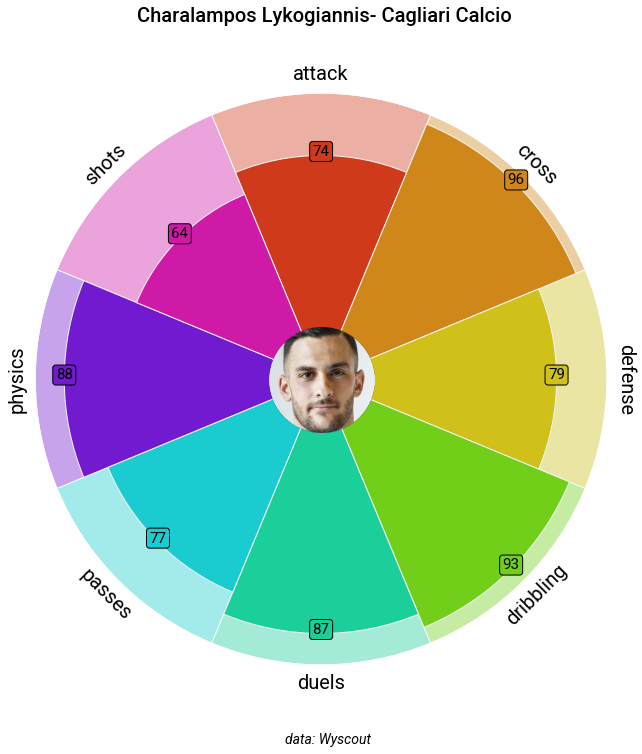

In [90]:
slice_colors = ["#CF3B1A"] + ["#CF871A"]+ ["#CFC01A"]+["#71CF1A"]+["#1ACF99"]+ ["#1ACCCF"] + ["#711ACF"] + ["#CF1AA8"]
text_colors = ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"]
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#FFFFFF",     # background color
    straight_line_color="#FFFFFF",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20)           # size of inner circle

fig, ax = baker.make_pizza(
    values_Lykogiannis,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=20,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=15, weight="bold",
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1, 
        )
    )                                # values to be used when adding parameter-values
)
CREDIT_1 = "data: Wyscout"


fig.text(
    0.55, 0.02, f"{CREDIT_1}", size=14,
    fontproperties=font_italic.prop, color="#000000",
    ha="right")

fig.text(
    0.515, 0.975, "Charalampos Lykogiannis- Cagliari Calcio", size=20,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
ax_image = add_image(
    img_lykogiannis, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.140
)   # these values might differ when you are plotting
fig.set_size_inches(18.5, 10.5)
plt.show()
fig.savefig('lykogiannis.png', dpi=fig.dpi)

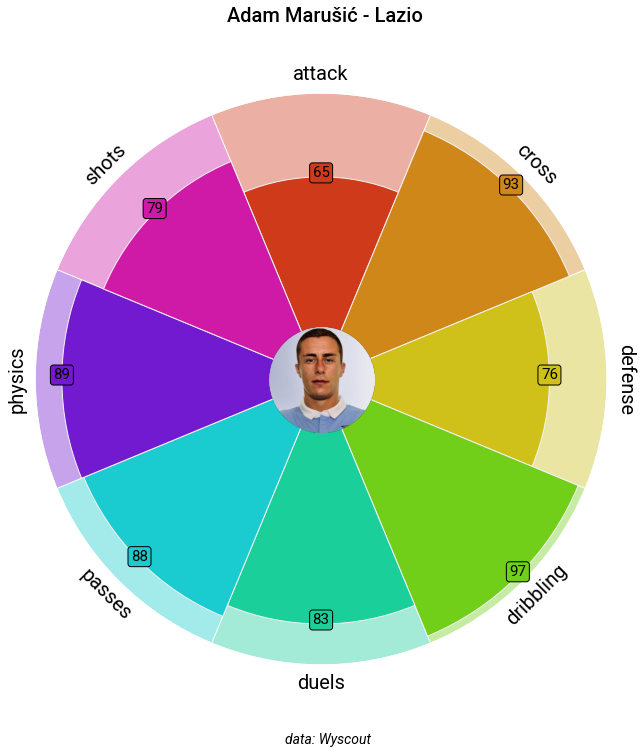

In [93]:
slice_colors = ["#CF3B1A"] + ["#CF871A"]+ ["#CFC01A"]+["#71CF1A"]+["#1ACF99"]+ ["#1ACCCF"] + ["#711ACF"] + ["#CF1AA8"]
text_colors = ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"]
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#FFFFFF",     # background color
    straight_line_color="#FFFFFF",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20)           # size of inner circle

fig, ax = baker.make_pizza(
    values_marusic,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=20,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=15, weight="bold",
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1, 
        )
    )                                # values to be used when adding parameter-values
)
CREDIT_1 = "data: Wyscout"


fig.text(
    0.55, 0.02, f"{CREDIT_1}", size=14,
    fontproperties=font_italic.prop, color="#000000",
    ha="right")

fig.text(
    0.515, 0.975, "Adam Marušić - Lazio", size=20,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
ax_image = add_image(
    img_marusic, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.140
)   # these values might differ when you are plotting
fig.set_size_inches(18.5, 10.5)
plt.show()
fig.savefig('marusic.png', dpi=fig.dpi)


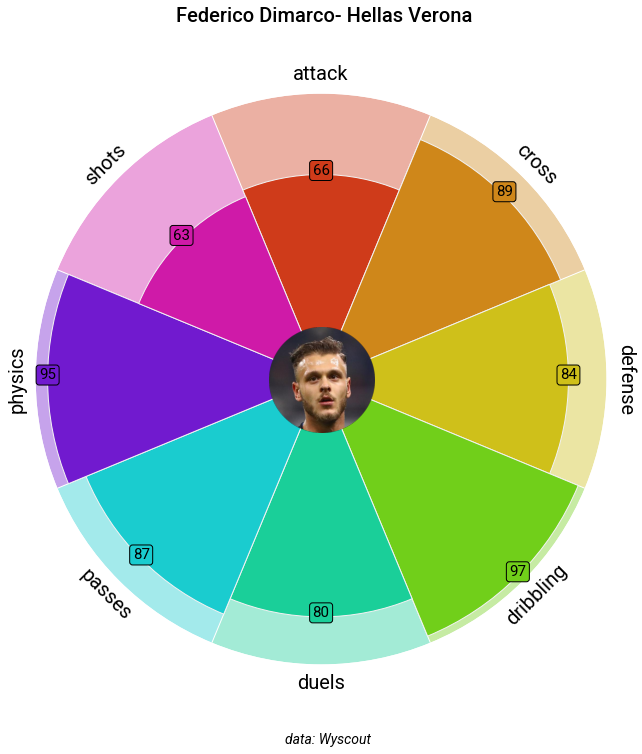

In [94]:
slice_colors = ["#CF3B1A"] + ["#CF871A"]+ ["#CFC01A"]+["#71CF1A"]+["#1ACF99"]+ ["#1ACCCF"] + ["#711ACF"] + ["#CF1AA8"]
text_colors = ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"] + ["#000000"]
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#FFFFFF",     # background color
    straight_line_color="#FFFFFF",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20)           # size of inner circle

fig, ax = baker.make_pizza(
    values_dimarco,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=20,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=15, weight="bold",
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1, 
        )
    )                                # values to be used when adding parameter-values
)
CREDIT_1 = "data: Wyscout"


fig.text(
    0.55, 0.02, f"{CREDIT_1}", size=14,
    fontproperties=font_italic.prop, color="#000000",
    ha="right")

fig.text(
    0.515, 0.975, "Federico Dimarco- Hellas Verona", size=20,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
ax_image = add_image(
    img_dimarco, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.140
)   # these values might differ when you are plotting
fig.set_size_inches(18.5, 10.5)
plt.show()
fig.savefig('dimarco.png', dpi=fig.dpi)


In [ ]:
with open (r'C:\Users\mauro\OneDrive\Desktop\FDA project work\data_gosens.json') as f:
    data = json.load(f)